# Intro

In this chapter, you'll learn about a dimension reduction technique called "Non-negative matrix factorization" ("NMF") that expresses samples as combinations of interpretable parts.

For example:
* Express documents as combinations of topics
* Express images in terms of commonly occurring visual patterns.

You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

NMF fits to non-negative data only:
* Word frequencies in each document
* Images encoded as arrays
* Audio spectrograms
* Purchase histories on e-commerce sites
* ... and many more!

# Wikipedia dataset

https://blog.lateral.io/2015/06/the-unknown-perils-of-mining-wikipedia/

It's a word frequency array (TF-IDF) of some Wikipedia articles where rows are words and columns are articles

In [1]:
import pandas as pd
words = pd.read_csv('Wikipedia articles/wikipedia-vocabulary-utf8.zip', header=None)[0].tolist()
wikipedia = pd.read_csv('Wikipedia articles/wikipedia-vectors.zip', index_col=0).set_axis(words).rename_axis('words').rename_axis('articles', axis=1)
wikipedia

articles,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
words,,,,,,,,,,,,,,,,,,,,,
aaron,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.000000,0.0
abandon,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.006110,0.0
abandoned,0.0,0.029607,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
abandoning,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.000000,0.0
abandonment,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zimbabwe,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
zinc,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
zone,0.0,0.000000,0.011594,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0


## NMF for articles

### Transposing TDF to DTF

Transposing the dataframe so articles become rows as we want to cluster on articles

In [2]:
from scipy.sparse import csr_matrix
articles = csr_matrix(wikipedia.transpose())
display(articles)
print(articles.toarray())

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.02960744 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.01159441 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.00610985 0.         ... 0.         0.00547551 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [3]:
from sklearn.decomposition import NMF
model = NMF(n_components=6) # previous chapter (3) also grouped 6 kmeans clusters
model.fit(articles)

NMF(n_components=6)

### NMF components

The dimension of components is the dimension of words, e.g., NMF components reduce dimension of 60 articles to 6 components.

In [4]:
print(f'{model.components_.shape=}')
article_nmf_components = pd.DataFrame(model.components_, columns=words).rename_axis('components').rename_axis('words', axis=1)
article_nmf_components

model.components_.shape=(6, 13125)


words,aaron,abandon,abandoned,abandoning,abandonment,abbas,abbey,abbreviated,abbreviation,abc,...,zealand,zenith,zeppelin,zero,zeus,zimbabwe,zinc,zone,zones,zoo
components,,,,,,,,,,,,,,,,,,,,,
0,0.011509,0.001224,0.000000,0.001759,0.000138,0.0,0.0,0.002493,3.000871e-07,0.000844,...,0.026085,0.0,0.008421,0.000000,0.0,0.0,0.0,0.000000,0.000428,0.0
1,0.000000,0.000010,0.005695,0.000000,0.000002,0.0,0.0,0.000569,5.031128e-04,0.000000,...,0.008152,0.0,0.000000,0.001719,0.0,0.0,0.0,0.002829,0.000299,0.0
2,0.000000,0.000008,0.000000,0.000000,0.004715,0.0,0.0,0.000762,1.613318e-05,0.000000,...,0.008774,0.0,0.000000,0.001324,0.0,0.0,0.0,0.000000,0.000144,0.0
3,0.004175,0.000000,0.003076,0.000000,0.000618,0.0,0.0,0.002452,8.191993e-05,0.004011,...,0.012675,0.0,0.000000,0.000000,0.0,0.0,0.0,0.001753,0.006764,0.0
4,0.000000,0.000571,0.004941,0.000000,0.000000,0.0,0.0,0.000089,4.278560e-05,0.000000,...,0.001818,0.0,0.000000,0.000017,0.0,0.0,0.0,0.000193,0.001358,0.0
5,0.000139,0.000000,0.008782,0.000000,0.000185,0.0,0.0,0.008663,1.535846e-05,0.000000,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.002410,0.001689,0.0


### NMF features

The dimension of features is the dimension of articles, e.g., NMF features reduce dimension of 13125 words to 6 features.

In [5]:
nmf_features = model.transform(articles)
print(f'{nmf_features.shape=}')
article_nmf_features = pd.DataFrame(nmf_features, index=wikipedia.columns.tolist()).rename_axis('articles').rename_axis('components', axis=1)
article_nmf_features

nmf_features.shape=(60, 6)


components,0,1,2,3,4,5
articles,,,,,,
HTTP 404,0.000000,0.000000,0.000000,0.000000,0.000000,0.438761
Alexa Internet,0.000000,0.000000,0.000000,0.000000,0.000000,0.564421
Internet Explorer,0.003777,0.000000,0.000000,0.000000,0.000000,0.397103
HTTP cookie,0.000000,0.000000,0.000000,0.000000,0.000000,0.380262
Google Search,0.000000,0.000000,0.000000,0.000000,0.000000,0.483651
Tumblr,0.012783,0.013715,0.007726,0.033220,0.000000,0.333235
Hypertext Transfer Protocol,0.000000,0.000000,0.020572,0.000000,0.006018,0.357669
Social search,0.000000,0.000000,0.000000,0.000000,0.000000,0.489091
Firefox,0.015250,0.014202,0.003748,0.023555,0.026142,0.478915


### Investigating NMF features

Notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 4th NMF component.

In [6]:
article_nmf_features.loc[['Anne Hathaway', 'Denzel Washington']]

components,0,1,2,3,4,5
articles,,,,,,
Anne Hathaway,0.003815,0.000000,0.0,0.571922,0.0,0.0
Denzel Washington,0.000000,0.005575,0.0,0.419605,0.0,0.0


Plotting components of known artists

<Axes: xlabel='components'>

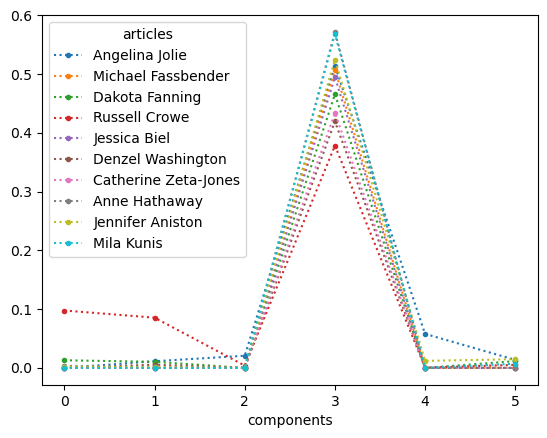

In [7]:
artists = ['Angelina Jolie', 'Michael Fassbender', 'Dakota Fanning', 'Russell Crowe', 'Jessica Biel', 'Denzel Washington', 'Catherine Zeta-Jones', 'Anne Hathaway', 'Jennifer Aniston', 'Mila Kunis']
article_nmf_features.loc[artists].T.plot(marker='.', linestyle=':')

### Identifying top words of the corresponding 4th NMF component

In [8]:
article_nmf_components.iloc[3].nlargest(10)

words
film           0.632043
award          0.254809
starred        0.246912
role           0.212854
actress        0.187634
played         0.170855
actor          0.158408
performance    0.149334
washington     0.146833
drama          0.130149
Name: 3, dtype: float64

### NMF approximately reconstructs samples

In [9]:
import numpy as np
print(nmf_features.shape, model.components_.shape)
np.matmul(nmf_features, model.components_).shape

(60, 6) (6, 13125)


(60, 13125)

In [10]:
import numpy as np
reconstructed = pd.DataFrame(np.matmul(nmf_features, model.components_).transpose(), index=words, columns=wikipedia.columns.tolist())\
    .rename_axis('words').rename_axis('articles', axis=1)
reconstructed.head()

articles,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
words,,,,,,,,,,,,,,,,,,,,,
aaron,0.000061,0.000078,0.000099,0.000053,0.000067,0.000332,0.000050,0.000068,0.000340,0.000446,...,0.003508,0.004188,0.004601,0.004430,0.004983,0.005209,0.003356,0.005065,0.003375,0.004712
abandon,0.000000,0.000000,0.000005,0.000000,0.000000,0.000016,0.000004,0.000000,0.000034,0.000025,...,0.000373,0.000445,0.000483,0.000455,0.000530,0.000554,0.000333,0.000542,0.000461,0.000465
abandoned,0.003853,0.004957,0.003488,0.003340,0.004248,0.003107,0.003171,0.004295,0.004489,0.003435,...,0.000000,0.000000,0.000406,0.000177,0.000000,0.000000,0.000354,0.000027,0.001112,0.000449
abandoning,0.000000,0.000000,0.000007,0.000000,0.000000,0.000022,0.000000,0.000000,0.000027,0.000019,...,0.000536,0.000640,0.000692,0.000653,0.000762,0.000796,0.000479,0.000774,0.000509,0.000658
abandonment,0.000081,0.000105,0.000074,0.000070,0.000090,0.000121,0.000163,0.000091,0.000123,0.000250,...,0.000042,0.000050,0.000086,0.000075,0.000060,0.000062,0.000073,0.000061,0.000102,0.000112


In [11]:
wikipedia.head()

articles,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
words,,,,,,,,,,,,,,,,,,,,,
aaron,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
abandon,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
abandoned,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
abandoning,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
abandonment,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


## NMF for words

In [12]:
model = NMF(n_components=10)
model.fit(wikipedia)

NMF(n_components=10)

### NMF components

The dimension of components is the dimension of articles, e.g., NMF components reduce dimension of 13125 word to the specified 10 components.

In [13]:
print(model.components_.shape)
word_nmf_components = pd.DataFrame(model.components_, columns=wikipedia.columns.tolist())\
    .rename_axis('components').rename_axis('articles', axis=1)
word_nmf_components

(10, 60)


articles,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
components,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.006100,0.000000,0.000000,0.023116,0.000000,0.000000,0.022814,0.020003,...,0.480161,0.573232,0.619584,0.585015,0.681955,0.712873,0.428617,0.692978,0.455974,0.588576
1,0.000000,0.000000,0.001534,0.000000,0.000000,0.010246,0.000000,0.000000,0.009478,0.025142,...,0.000000,0.000000,0.014907,0.002566,0.000000,0.000000,0.006762,0.000000,0.012382,0.015535
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034430,0.000000,0.000000,0.009108,...,0.000000,0.000000,0.006816,0.000000,0.000000,0.000000,0.000000,0.000498,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.023665,0.000000,0.000000,0.023824,0.049024,...,0.000000,0.000000,0.013691,0.029667,0.000000,0.000000,0.042255,0.000000,0.008073,0.077788
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024268,0.017280,...,0.000000,0.000000,0.000000,0.000015,0.000000,0.000000,0.000000,0.006885,0.132287,0.016177
5,0.045586,0.459360,0.000000,0.000000,0.687442,0.388080,0.000000,0.712904,0.071941,0.385558,...,0.000000,0.000000,0.017260,0.002401,0.000000,0.000000,0.000793,0.000000,0.004302,0.004467
6,0.478466,0.233423,0.443655,0.456842,0.000000,0.032152,0.476417,0.000000,0.470979,0.038178,...,0.000000,0.000000,0.008528,0.004922,0.000000,0.000000,0.021357,0.000000,0.006391,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.006364,0.000000,0.000000,0.005204,0.014164,...,0.000000,0.000000,0.002600,0.000000,0.000000,0.000000,0.000000,0.000000,0.099423,0.001445
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.014247,0.000000,0.000000,0.008040,0.034656,...,0.000000,0.000000,0.000000,0.000206,0.000605,0.000000,0.000000,0.000000,0.019492,0.002098


### Top articles of a given component

Choosing a component, such as the first one, and looking at which articles have the highest values

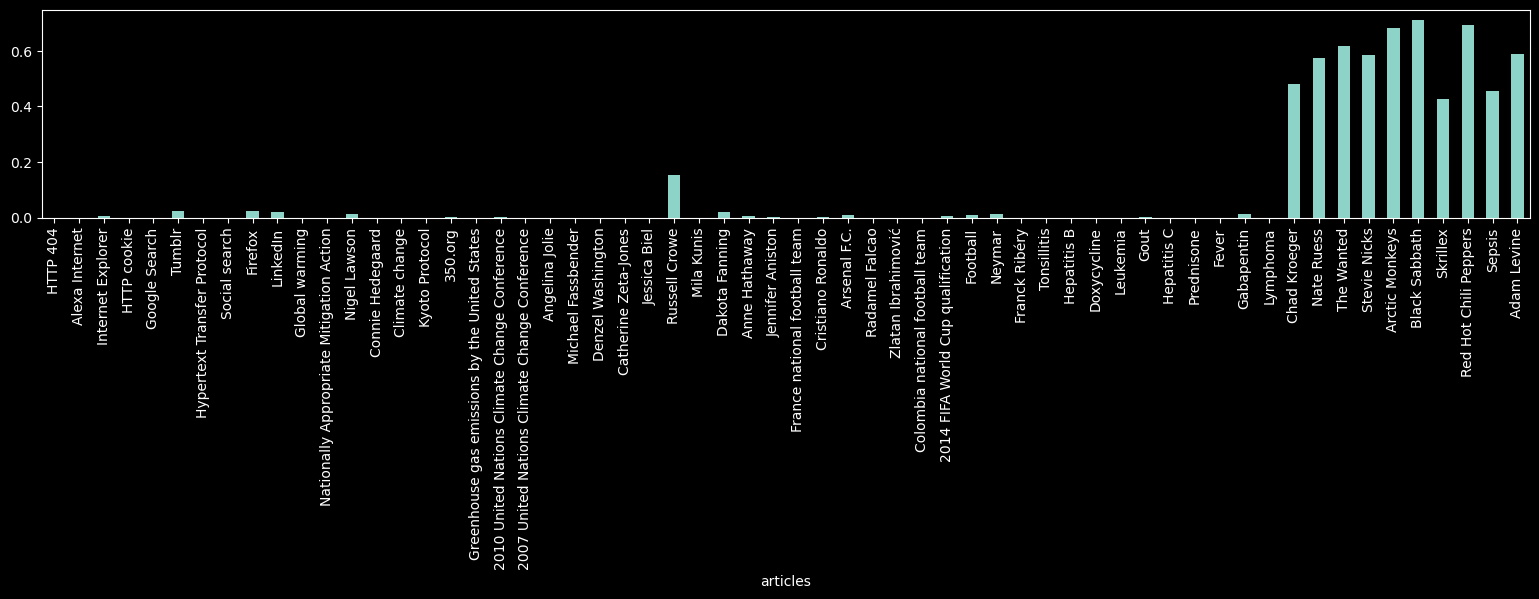

In [14]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')
word_nmf_components.head(1).T.plot(kind='bar', figsize=(19.2, 10.8/4), legend=False); plt.show()

Top articles of the first component

In [15]:
word_nmf_components.iloc[0].nlargest()

articles
Black Sabbath            0.712873
Red Hot Chili Peppers    0.692978
Arctic Monkeys           0.681955
The Wanted               0.619584
Adam Levine              0.588576
Name: 0, dtype: float64

### Top components of a given article

Top components of the article "Neymar"

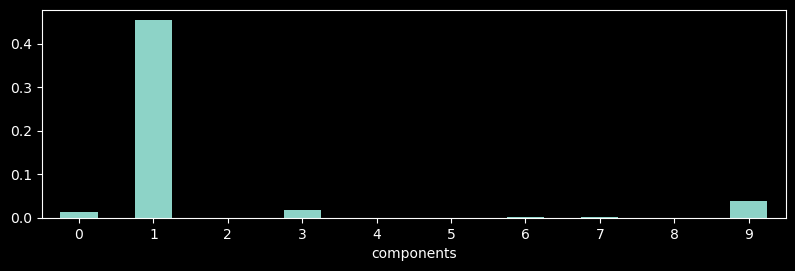

In [16]:
word_nmf_components['Neymar'].T.plot(kind='bar', figsize=(19.2/2, 10.8/4), legend=False, rot=0); plt.show()

In [17]:
word_nmf_components['Neymar'].sort_values(ascending=False).head()

components
1    0.454739
9    0.038057
3    0.018002
0    0.012763
6    0.000944
Name: Neymar, dtype: float64

### NMF features

In [18]:
nmf_features = model.transform(wikipedia)
print(nmf_features.shape)
word_nmf_features = pd.DataFrame(nmf_features, index=wikipedia.index.tolist())
word_nmf_features

(13125, 10)


,0,1,2,3,4,5,6,7,8,9
aaron,0.007301,0.000000,0.000000,0.005215,0.000000,0.000000,0.000603,0.000000,0.000000,0.000000
abandon,0.000779,0.000015,0.000000,0.000000,0.000395,0.000000,0.000000,0.000439,0.000065,0.000000
abandoned,0.000000,0.003973,0.000000,0.003794,0.007026,0.008379,0.004406,0.000000,0.000000,0.007057
abandoning,0.001117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
abandonment,0.000033,0.000000,0.000000,0.000514,0.000000,0.000000,0.000345,0.000000,0.009304,0.000000
...,...,...,...,...,...,...,...,...,...,...
zimbabwe,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zinc,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
zone,0.000000,0.000703,0.000000,0.002198,0.000167,0.000000,0.004431,0.000065,0.000000,0.006007
zones,0.000274,0.000134,0.000076,0.008399,0.001246,0.003037,0.000000,0.000659,0.000239,0.000481


### NMF approximately reconstructs samples

In [19]:
reconstructed = np.matmul(nmf_features, model.components_)
print(reconstructed.shape)
pd.DataFrame(reconstructed, index=wikipedia.index.tolist(), columns=wikipedia.columns.tolist()).head()

(13125, 60)


,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
aaron,0.000288,0.000141,0.000312,0.000275,0.00000,0.000312,0.000287,0.000000,0.000575,0.000425,...,0.003506,0.004185,0.004600,0.004429,0.004979,0.005205,0.003363,0.005060,0.003375,0.004703
abandon,0.000000,0.000000,0.000005,0.000000,0.00000,0.000022,0.000000,0.000000,0.000030,0.000031,...,0.000374,0.000447,0.000484,0.000456,0.000532,0.000556,0.000334,0.000543,0.000453,0.000466
abandoned,0.002490,0.004878,0.001961,0.002013,0.00576,0.003566,0.002099,0.005974,0.003051,0.003887,...,0.000000,0.000000,0.000466,0.000165,0.000000,0.000000,0.000288,0.000064,0.001092,0.000508
abandoning,0.000000,0.000000,0.000007,0.000000,0.00000,0.000026,0.000000,0.000000,0.000025,0.000022,...,0.000536,0.000640,0.000692,0.000653,0.000762,0.000796,0.000479,0.000774,0.000509,0.000657
abandonment,0.000165,0.000081,0.000153,0.000158,0.00000,0.000157,0.000164,0.000000,0.000250,0.000361,...,0.000016,0.000019,0.000031,0.000038,0.000028,0.000024,0.000043,0.000023,0.000203,0.000079


In [20]:
wikipedia.head()

articles,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,LinkedIn,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
words,,,,,,,,,,,,,,,,,,,,,
aaron,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
abandon,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
abandoned,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
abandoning,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
abandonment,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


# NMF for images

* Collection of images of the same size
* Encode as 2D array
* Each row corresponds to an image
* Each column corresponds to a pixel

## Grayscal image example

In [21]:
sample = np.array([0, 1, 0.5, 1, 0, 1])
bitmap = sample.reshape((2,3))
bitmap

array([[0. , 1. , 0.5],
       [1. , 0. , 1. ]])

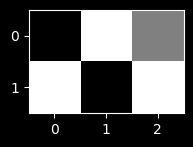

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(bitmap, cmap='gray')#, interpolation='nearest')
plt.show()

# LCD digit dataset

Humdred monochromatic LCD digits images with 13x8 pixels

In [23]:
digits = pd.read_csv('lcd-digits.zip', header=None).rename_axis('images').rename_axis('bitmaps', axis=1)
digits

bitmaps,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
images,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Plot first image

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


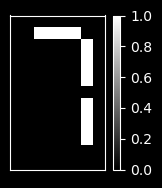

In [24]:
bitmap = digits.iloc[0].values.reshape(13,8)
print(bitmap)
plt.figure(figsize=(2,2))
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.xticks([]); plt.yticks([])
plt.show()

## NMF components

7 (seven) is the expected number of cells in a LCD digit: https://en.wikipedia.org/wiki/Seven-segment_display

In [25]:
model = NMF(n_components=7)

The dimension of the components is the dimension of an image (13x8=104 bits)

In [26]:
model.fit(digits)
model.components_.shape

(7, 104)

## Plotting components

Each componet is learned as a cell in the LCD display

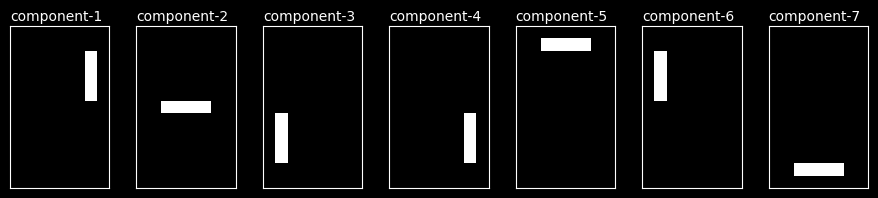

In [27]:
fig = plt.figure(figsize=(9,2))
for i, component in enumerate(model.components_):
    fig.add_subplot(1,7,i+1)
    bitmap = component.reshape((13, 8))
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.text(-0.5,-1, f'component-{i+1}')
    # plt.colorbar()
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## NMF features

In [28]:
features = model.transform(digits)
print(features.shape)

(100, 7)


In [29]:
# Select the 0th row of features: digit_features
features[0,:]

array([2.57348958e-01, 0.00000000e+00, 5.02512222e-22, 3.94333375e-01,
       3.64045642e-01, 0.00000000e+00, 1.97389745e-15])

As the first image is 7 we can see high values for respective 3 components (cells)

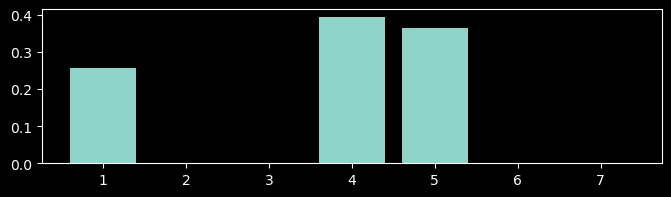

In [30]:
plt.figure(figsize=(8,2))
plt.bar(range(1,8), features[0,:]); plt.show()

Plotting components of the first image

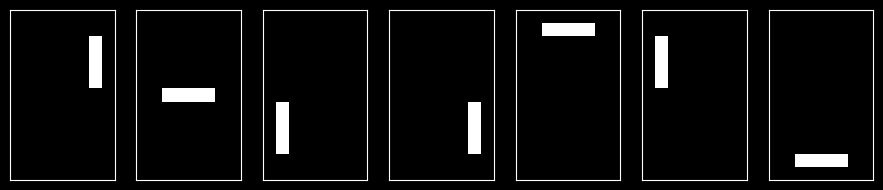

In [31]:
fig = plt.figure(figsize=(9,2))
for i, component in enumerate(model.components_):
    fig.add_subplot(1,7,i+1)
    bitmap = component.reshape((13, 8))
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    # plt.colorbar()
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

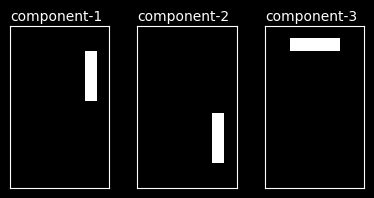

In [32]:
fig = plt.figure(figsize=(9,2))
for i, component in enumerate(model.components_[[0,3,4]]):
    fig.add_subplot(1,7,i+1)
    bitmap = component.reshape((13, 8))
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.text(-0.5,-1, f'component-{i+1}')
    # plt.colorbar()
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

## PCA doesn't learn parts

Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LCD digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LCD digits!

In [33]:
def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    """
    bitmap = vector.reshape((13, 8))  # make a square array
    bitmap /= np.abs(vector).max()  # normalise
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.figure(figsize=(2, 2))
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

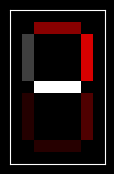

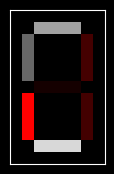

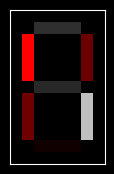

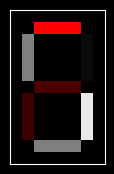

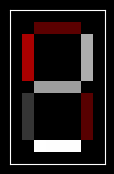

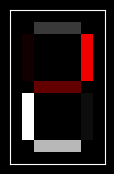

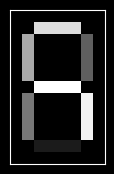

In [34]:
from sklearn.decomposition import PCA
model = PCA(n_components=7)
features = model.fit_transform(digits)
for component in model.components_:
    show_as_image(component)    

# Wikipedia recommender system using NMF

Suppose that you are an engineer at a large online newspaper. You've been given the task of recommending articles that are similar to the article currently being read by a customer.

**Given an article, how can you find articles that have similar topics?**

Our strategy for solving this problem is to apply NMF to the word-frequency array of the articles, and to use the resulting NMF features. You learned in the previous videos these NMF features describe the topic mixture of an article. So similar articles will have similar NMF features. But how can two articles be compared using their NMF features?

The cosine similarity uses the angle between the lines. [Wikipedia](https://en.wikipedia.org/wiki/Cosine_similarity).

## NMF features for articles

Uses wikipedia dasaset transposed, having articles on rows because we want to recommend articles

In [35]:
articles.shape

(60, 13125)

In [36]:
model = NMF(n_components=6)
model.fit(articles)
nmf_features = model.transform(articles)
nmf_features.shape

(60, 6)

## NMF features dataframe lookup

In [37]:
nmf_features_df = pd.DataFrame(nmf_features, index=wikipedia.columns)
nmf_features_df.describe()

,0,1,2,3,4,5
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.065343,0.079516,0.075246,0.090538,0.076719,0.074368
std,0.140002,0.179152,0.163915,0.181899,0.159389,0.161531
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000279,0.000000,0.000115,0.000000,0.000178
75%,0.011312,0.014231,0.015563,0.039066,0.021215,0.014024
max,0.452618,0.641318,0.548277,0.571869,0.539666,0.564312


## Normalize NMF features

In [38]:
from sklearn.preprocessing import normalize
norm_features = normalize(nmf_features)
norm_features.shape

(60, 6)

## Normalized NMF features dataframe lookup

In [39]:
norm_features_df = pd.DataFrame(norm_features, index=wikipedia.columns)
norm_features_df.describe()

,0,1,2,3,4,5
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,0.172813,0.178035,0.176449,0.193050,0.185856,0.175470
std,0.364826,0.370537,0.370799,0.365834,0.373190,0.370609
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000953,0.000000,0.000497,0.000000,0.000361
75%,0.031769,0.039101,0.044743,0.121322,0.054906,0.033339
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Normalized NMF features of a given article

In [40]:
current_article = norm_features_df.loc['Cristiano Ronaldo']
current_article

0    0.002506
1    0.999942
2    0.000859
3    0.010259
4    0.001949
5    0.000722
Name: Cristiano Ronaldo, dtype: float64

## Cosine similarity: dot product of normalized features and normalized current article

From [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html): Scaling inputs to unit norms is a common operation for text classification or clustering for instance.

For instance, the dot product of two l2-normalized TF-IDF vectors is the cosine similarity of the vectors and is the base similarity metric for the Vector Space Model commonly used by the Information Retrieval community.

This dot product results in cosine similarity vector of the 60 articles

In [41]:
similarities = norm_features_df.dot(current_article)
similarities.shape

(60,)

## Largest n similarities

In [42]:
similarities.nlargest()

articles
Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999973
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64

## Similarities larger than .9

In [43]:
similarities[lambda n: n>=.9].sort_values(ascending=False)

articles
Cristiano Ronaldo                    1.000000
Franck Ribéry                        0.999973
Zlatan Ibrahimović                   0.999942
Radamel Falcao                       0.999942
France national football team        0.999923
Colombia national football team      0.999897
Neymar                               0.999024
2014 FIFA World Cup qualification    0.998443
Arsenal F.C.                         0.997746
Football                             0.974962
dtype: float64

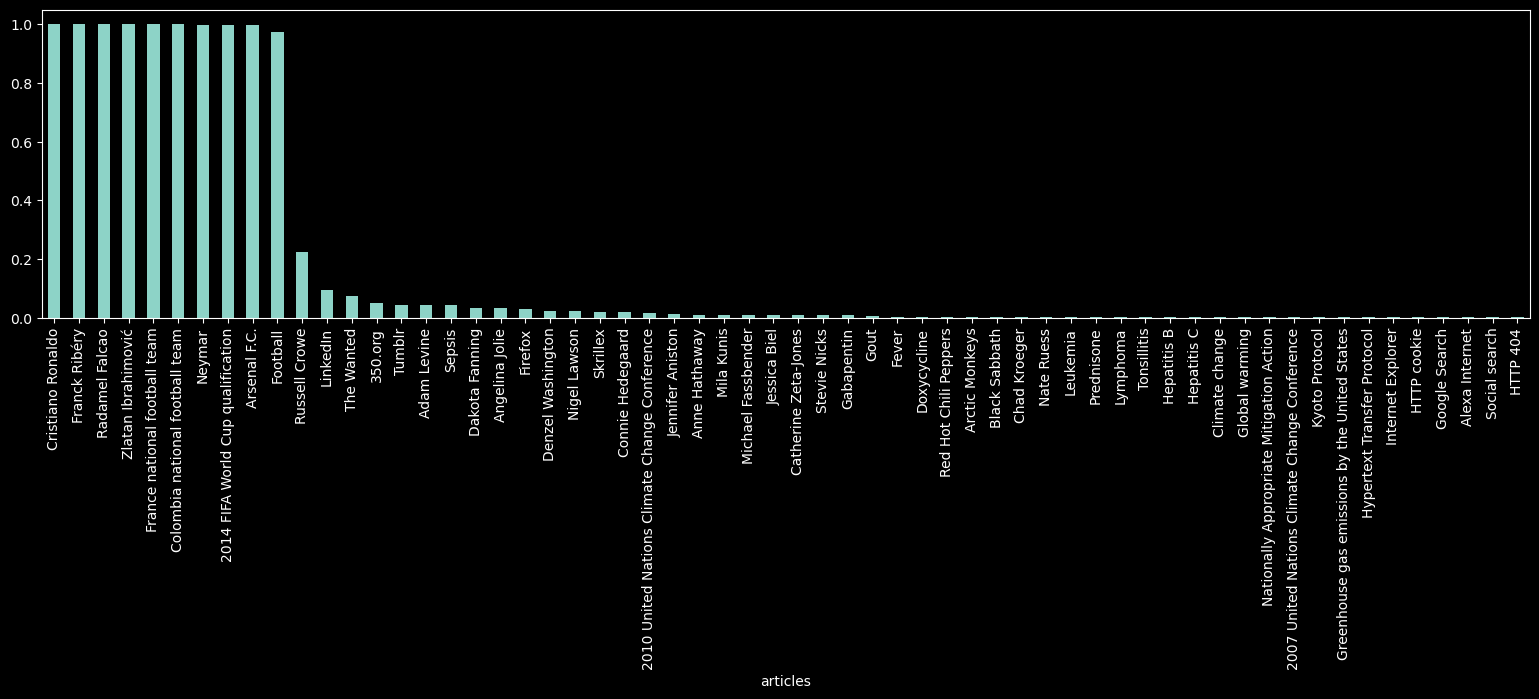

In [44]:
similarities.sort_values(ascending=False).plot(kind='bar', figsize=(19.2, 4)); plt.show()

# Musical artists recommender system using NMF

In [60]:
artists = pd.read_csv('Musical artists/artists.zip', header=None).set_axis(['artist'], axis=1)
playcounts = pd.read_csv('Musical artists/scrobbler-small-sample.zip').rename(columns={'playcount':'user_playcount'})
artist_playcounts = artists[[]].join(playcounts.set_index('artist_offset')).pivot(columns='user_offset').rename_axis('artist')
artist_playcounts.fillna('')

user_playcount                                            ...      \
user_offset            0      1      2   3   4   5   6   7   8   9    ... 490   
artist                                                                ...       
0                                  105.0                              ...       
1                    128.0  211.0                                     ...       
2                                                                     ...       
3                                                                     ...       
4                                                                     ...       
...                    ...    ...    ...  ..  ..  ..  ..  ..  ..  ..  ...  ..   
106                                                                   ...       
107                                 75.0                              ...       
108                                                                   ...       
109                                                                   ...       
110                                                                   ...       

                                                              
user_offset 491   492    493 494    495   496 497    498 499  
artist                                                        
0                                                             
1                      270.0      105.0  97.0                 
2                                                             
3                                                             
4                                                             
...          ..   ...    ...  ..    ...   ...  ..    ...  ..  
106              84.0                                         
107              51.0                              475.0      
108                                                           
109                                                 55.0      
110                                                           

[111 rows x 500 columns]

## Normalized NMF features

The artist_playcounts dataset has artist on rows already, on which we want to generate NMF features so no transposing is required

In [85]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline
# Sparse matrix of zero imputed artist playcounts
samples = csr_matrix(artist_playcounts.fillna(0)) # must impute 0 otherwise nans would be stored in the CSR matrix
samples

<111x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2894 stored elements in Compressed Sparse Row format>

Pipeline:
* MaxAbsScaler of user_playcounts columns: scale each feature to the [-1, 1] range without breaking the sparsity.  **As values are non-negative, this scaling ranges values from 0 to 1.**
* NMF factorization of the scaled artist playcounts in 20 components
* L2 Normalization of the artist NMF components

In [90]:
scaler = MaxAbsScaler()
nmf = NMF(n_components=20, random_state=1)
normalizer = Normalizer()
pipeline = make_pipeline(scaler,
                         nmf,
                         normalizer
                        )
# Apply fit_transform to artists
norm_features = pipeline.fit_transform(samples)
norm_features_df = pd.DataFrame(norm_features.toarray() if isinstance(norm_features, csr_matrix) else norm_features, index=artists.artist).rename_axis('nmf_component', axis=1)
display(norm_features_df)

<class 'numpy.ndarray'>


nmf_component,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
artist,,,,,,,,,,,,,,,,,,,,
Massive Attack,0.000000,0.000000,0.198585,0.000000,0.000000,0.000000,0.000000,0.88118,0.160027,0.010181,0.000000,0.314158,0.000000,0.055674,0.000000,0.000000,0.000000,0.000000,0.237860,0.000000
Sublime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
Beastie Boys,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Neil Young,0.325971,0.004670,0.000000,0.047396,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.940517,0.080160,0.000000,0.021849,0.000000
Dead Kennedys,0.000000,0.097219,0.000000,0.654025,0.000000,0.000000,0.000000,0.00000,0.116798,0.672689,0.294756,0.000000,0.000000,0.000000,0.000000,0.098826,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Franz Ferdinand,0.000000,0.000000,0.000000,0.000000,0.003587,0.000000,0.000000,0.00000,0.000000,0.000000,0.999977,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005680,0.000000,0.000000
The Postal Service,0.000000,0.000000,0.000000,0.000000,0.007136,0.000000,0.000000,0.00000,0.999919,0.000000,0.000000,0.000000,0.000000,0.000000,0.002068,0.000000,0.000000,0.010356,0.000000,0.000000
The Dresden Dolls,0.000000,0.101323,0.161126,0.000000,0.000000,0.338870,0.000000,0.00000,0.097815,0.184016,0.208424,0.000000,0.306602,0.000000,0.000000,0.000000,0.308337,0.489972,0.575582,0.040323


## Recommend similar preferences based on play counts of users

In [48]:
df = pd.DataFrame(norm_features, index=artists.artist)
# Compute cosine similarities: similarities
preference = 'Bruce Springsteen'
similarities = df.dot(df.loc[preference])
# Display those with highest cosine similarity
similarities.nlargest(10)

artist
Bruce Springsteen    1.000000
Leonard Cohen        0.960425
Neil Young           0.948952
The Beach Boys       0.857982
Van Morrison         0.833553
Bob Dylan            0.812831
Ryan Adams           0.805481
Simon & Garfunkel    0.797302
Tom Waits            0.746732
Phish                0.725533
dtype: float64

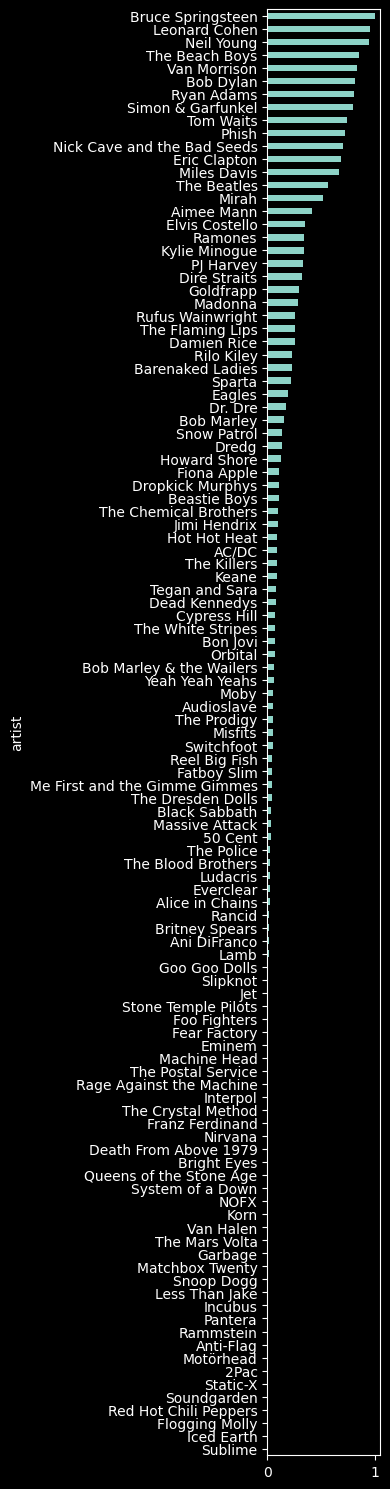

In [49]:
similarities = df.dot(df.loc[preference])
similarities.sort_values(ascending=True).plot(kind='barh', figsize=(4, 15)); plt.tight_layout();plt.show()